In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

In [8]:
train_dir = 'chest_xray/train'
val_dir = 'chest_xray/val'
test_dir = 'chest_xray/test'

In [9]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [11]:
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.


In [13]:
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 16 images belonging to 2 classes.


In [14]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 624 images belonging to 2 classes.


In [15]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [16]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid') 
])

In [17]:
base_model.trainable = False

In [18]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [19]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_steps=val_generator.samples // BATCH_SIZE
)

Epoch 1/10
163/163 [==============================] - 345s 2s/step - loss: 0.5837 - accuracy: 0.7343
Epoch 2/10
163/163 [==============================] - 348s 2s/step - loss: 0.5435 - accuracy: 0.7450
Epoch 3/10
163/163 [==============================] - 346s 2s/step - loss: 0.5129 - accuracy: 0.7469
Epoch 4/10
163/163 [==============================] - 347s 2s/step - loss: 0.4751 - accuracy: 0.7586
Epoch 5/10
163/163 [==============================] - 344s 2s/step - loss: 0.4480 - accuracy: 0.7697
Epoch 6/10
163/163 [==============================] - 344s 2s/step - loss: 0.4360 - accuracy: 0.7759
Epoch 7/10
163/163 [==============================] - 344s 2s/step - loss: 0.4329 - accuracy: 0.7730
Epoch 8/10
163/163 [==============================] - 345s 2s/step - loss: 0.4257 - accuracy: 0.7492
Epoch 9/10
163/163 [==============================] - 349s 2s/step - loss: 0.4174 - accuracy: 0.7876
Epoch 10/10
163/163 [==============================] - 345s 2s/step - loss: 0.4126 - accura

In [20]:
base_model.trainable = True
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [21]:
history_finetune = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_steps=val_generator.samples // BATCH_SIZE
)

Epoch 1/10
163/163 [==============================] - 1536s 9s/step - loss: 0.2038 - accuracy: 0.9325
Epoch 2/10
163/163 [==============================] - 1534s 9s/step - loss: 0.1068 - accuracy: 0.9618
Epoch 3/10
163/163 [==============================] - 1528s 9s/step - loss: 0.0761 - accuracy: 0.9745
Epoch 4/10
163/163 [==============================] - 1526s 9s/step - loss: 0.0653 - accuracy: 0.9770
Epoch 5/10
163/163 [==============================] - 1615s 10s/step - loss: 0.0555 - accuracy: 0.9816
Epoch 6/10
163/163 [==============================] - 1542s 9s/step - loss: 0.0522 - accuracy: 0.9797
Epoch 7/10
163/163 [==============================] - 1620s 10s/step - loss: 0.0438 - accuracy: 0.9854
Epoch 8/10
163/163 [==============================] - 1538s 9s/step - loss: 0.0385 - accuracy: 0.9858
Epoch 9/10
163/163 [==============================] - 1496s 9s/step - loss: 0.0501 - accuracy: 0.9826
Epoch 10/10
163/163 [==============================] - 1476s 9s/step - loss: 0.0

In [27]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

20/20 [==============================] - 38s 2s/step - loss: 0.6414 - accuracy: 0.8702
Test Accuracy: 87.02%


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np


predictions = model.predict(test_generator)
predicted_classes = (predictions > 0.5).astype("int32") 

In [29]:
true_classes = test_generator.classes

class_labels = list(test_generator.class_indices.keys())
accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes)
recall = recall_score(true_classes, predicted_classes)
f1 = f1_score(true_classes, predicted_classes)
conf_matrix = confusion_matrix(true_classes, predicted_classes)

In [31]:
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

Precision: 0.6402569593147751
Recall: 0.7666666666666667
F1 Score: 0.6977829638273045

Confusion Matrix:
[[ 66 168]
 [ 91 299]]

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.42      0.28      0.34       234
   PNEUMONIA       0.64      0.77      0.70       390

    accuracy                           0.58       624
   macro avg       0.53      0.52      0.52       624
weighted avg       0.56      0.58      0.56       624



AUC Score: 0.5130780188472497


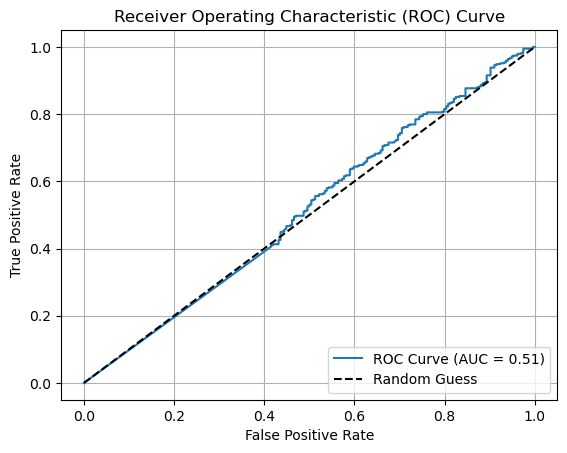

In [32]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

predicted_probs = predictions.ravel()  

auc = roc_auc_score(true_classes, predicted_probs)
print("AUC Score:", auc)

fpr, tpr, thresholds = roc_curve(true_classes, predicted_probs)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


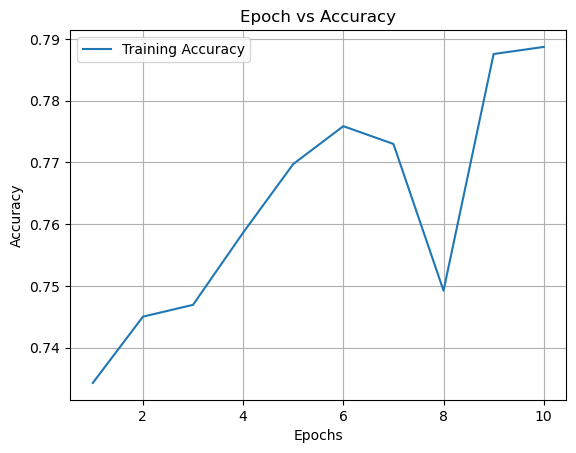

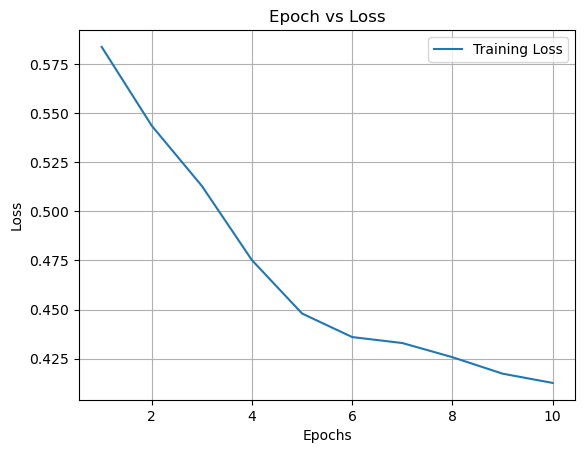

In [34]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']
epochs = range(1, len(train_acc) + 1)

plt.figure()
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Epoch vs Accuracy')
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.plot(epochs, train_loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.legend()
plt.grid()
plt.show()
